<a href="https://colab.research.google.com/github/ThomasL642/Thomas/blob/main/Cat_and_Dog_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

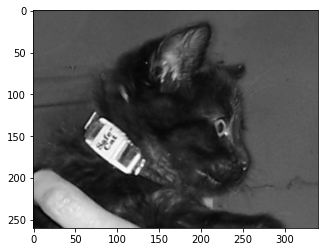

[[85 84 84 ... 80 81 82]
 [84 84 84 ... 81 81 81]
 [84 83 84 ... 81 81 80]
 ...
 [18 17 19 ... 95 94 93]
 [19 18 20 ... 95 94 93]
 [24 21 20 ... 95 94 93]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/content/drive/MyDrive/Colab Notebooks/DATA/cats and dogs"
CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) #path to cat or dogs dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break
  
print(img_array)


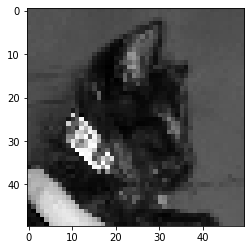

In [ ]:
IMG_SIZE = 50


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()


In [ ]:
from tqdm import tqdm
training_data = []

def create_training_data():
  for category in CATEGORIES:
      path = os.path.join(DATADIR, category) #path to cat or dogs dir
      class_num = CATEGORIES.index(category)
      for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
            training_data.append([new_array, class_num])
        except Exception as e:
          pass

create_training_data()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(len(training_data))

In [ ]:
# this is really not important, it's already going to be shuffled when keras is training on it
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)
  
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

pickle_out = open("/content/drive/MyDrive/Colab Notebooks/cats and dogs/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Colab Notebooks/cats and dogs/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/cats and dogs/X.pickle", "rb")
X = pickle.load(pickle_in)

In [ ]:
X[1]